### Loan Prediction
Problem: Predict if a loan will get approved or not.
A Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.
Source: https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii

### Data Analysis Workflow
The various steps needed to accomplish the required task.

In [1]:
# Data cleaning and formatting
# Exploratory data analysis
# Feature engineering and selection
# Split-out Training and Validation dataset
# Evaluate the best model on the validation set
# Interpret the model results
# Analysis conclusions

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

#### Data cleaning and formatting

In [3]:
# Load dataset
df_train = pd.read_csv('../data/train.csv')

In [4]:
# Dimensions of the dataset.
print(df_train.shape)

(614, 13)


In [5]:
# Inspect the Data
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
# Statistical summary of numerical all attributes.
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# Distribution
# number of instances (rows) that belong to each class
print(df_train.groupby('Loan_Status').size())

Loan_Status
N    192
Y    422
dtype: int64


In [8]:
# Missing values
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values acorss a number of attributes, this needs to be fixed.

In [9]:
# replace missing values using 'mode' and ''mean of attribute values
df_train['Gender'].fillna(df_train['Gender'].mode()[0], inplace=True)
df_train['Married'].fillna(df_train['Married'].mode()[0], inplace=True)
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace=True)
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0], inplace=True)
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace=True)
df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean(), inplace=True)

In [10]:
df_train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

Over 80% of self employed applicants got rejected, it will be safe to fill the missing values with NO.

In [11]:
df_train['Self_Employed'].fillna('No',inplace=True)

In [12]:
# Missing values
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

No more missing values for df_train

#### Exploratory data analysis (Univariate and Multivarate)
Univariate plots to better understand each attribute.
Given that the input variables are numeric, we can create box and whisker plots of each.
This gives a clearer idea of the distribution of the input attributes

Multivarate plots help to understand the relationships between attributes.

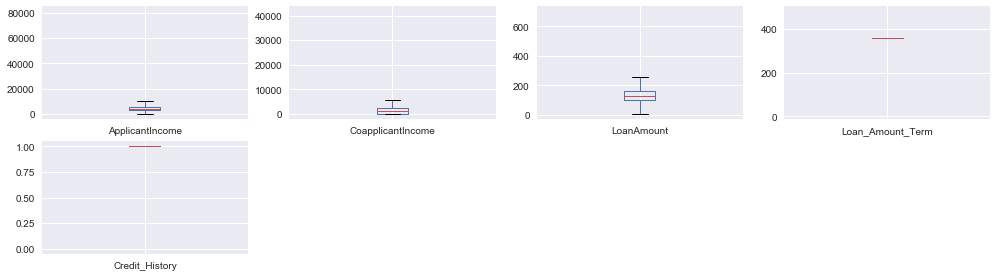

In [13]:
# Box plot of numerical attributes
df_train.plot(kind='box', subplots=True, layout=(5,4), sharex=False, sharey=False, figsize=(17,12))
plt.show()

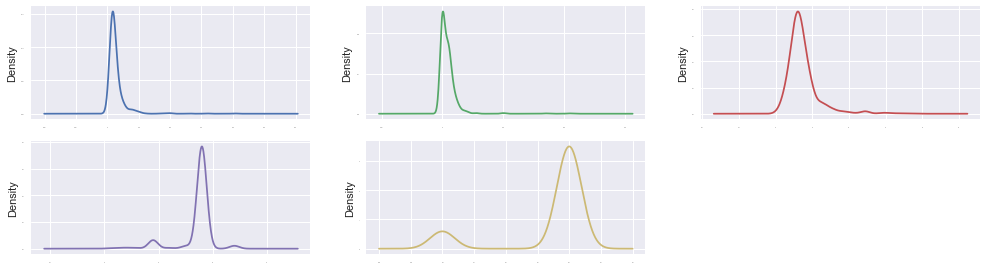

In [14]:
# The same perspective of the data using density plots.
df_train.plot(kind= 'density' , subplots=True, sharex=False, legend=False, fontsize=1,figsize=(17,12),layout=(5,3))
plt.show()

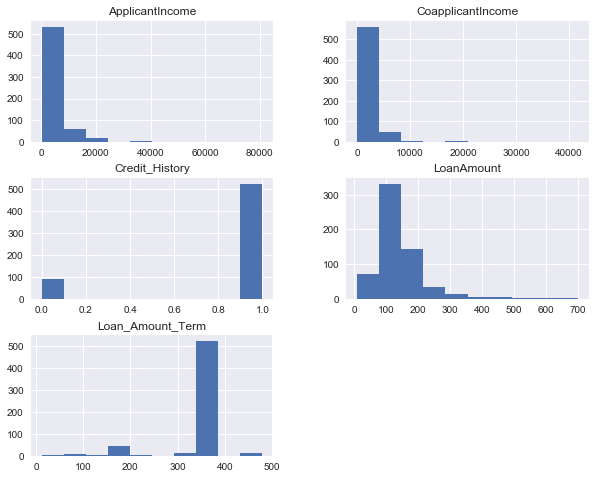

In [15]:
# histograms
df_train.hist(figsize=(10,8))
plt.show()

The LoanAmount attribute looks like it has a Gaussian distribution. This is useful to note as algorithms that can exploit this assumption can be used.

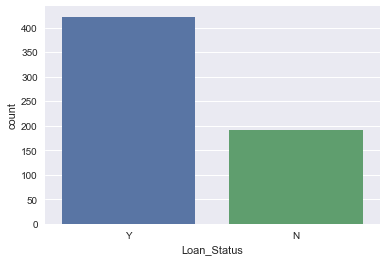

In [16]:
# Target variable: Loan_Status
sns.countplot(x='Loan_Status', data=df_train);

Alot of people got loans, and half of the total people that got loans got denied*

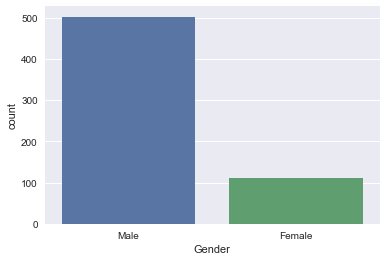

In [17]:
# The Gender attribute
sns.countplot(x='Gender', data=df_train);

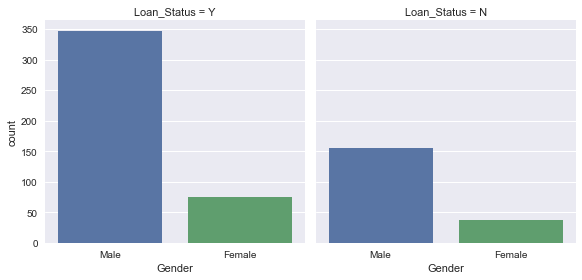

In [18]:
# Comparing the Gender and Loan_Status attributes
sns.factorplot(x='Gender', col='Loan_Status', kind='count',data=df_train)

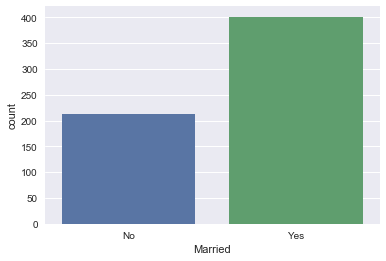

In [19]:
# The Married attribute
ax = plt.subplots()
sns.countplot(x='Married', data=df_train);

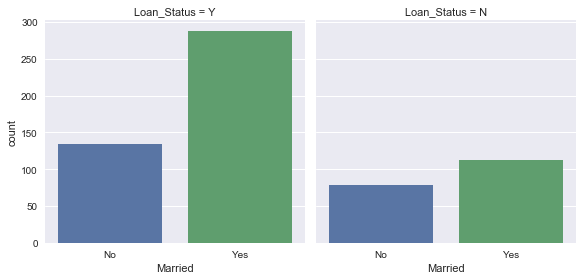

In [20]:
# Comparing the Married and Loan_Status attributes
sns.factorplot(x='Married', col='Loan_Status', kind='count',data=df_train)

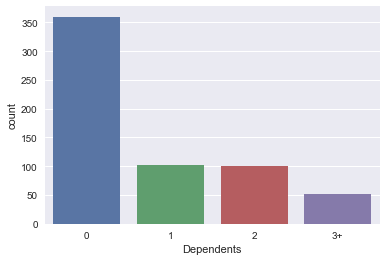

In [21]:
# The Dependents attribute
ax = plt.subplots()
sns.countplot(x='Dependents', data=df_train);

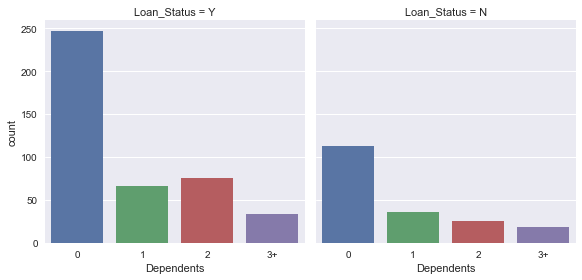

In [22]:
# Comparing the Dependents and Loan_Status attributes
sns.factorplot(x='Dependents', col='Loan_Status', kind='count',data=df_train)

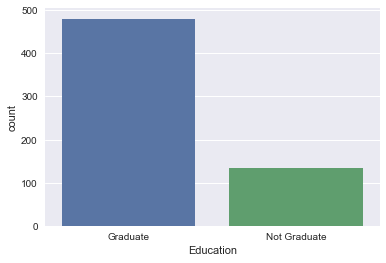

In [23]:
# The Education attribute
ax = plt.subplots()
sns.countplot(x='Education', data=df_train);

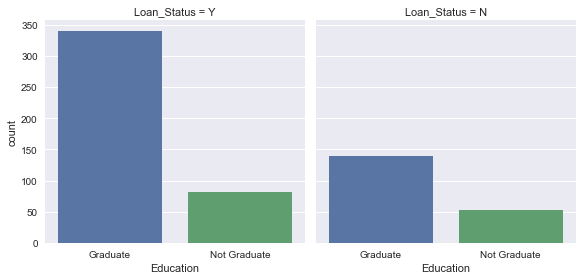

In [24]:
# Comparing the Education and Loan_Status attributes
sns.factorplot(x='Education', col='Loan_Status', kind='count',data=df_train)

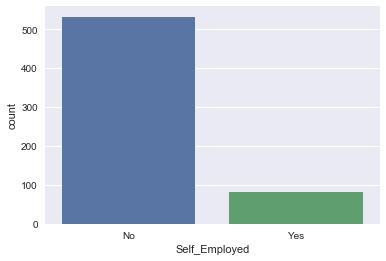

In [25]:
# The Self_Employed attribute
ax = plt.subplots()
sns.countplot(x='Self_Employed', data=df_train);

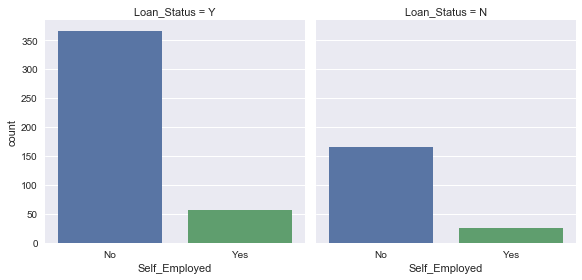

In [26]:
# Comparing the Self_Employed and Loan_Status attributes
sns.factorplot(x='Self_Employed', col='Loan_Status', kind='count',data=df_train)

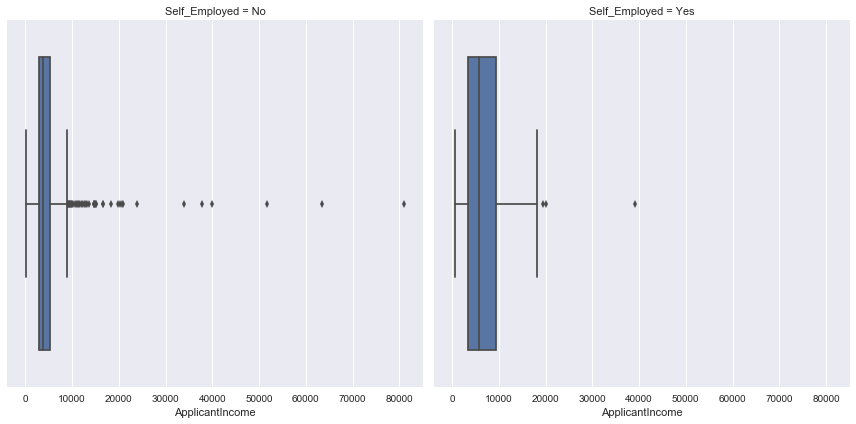

In [27]:
# Comparing the ApplicantIncome and Self_Employed attributes
sns.factorplot(x='ApplicantIncome', col='Self_Employed', kind='box', data=df_train, hue='ApplicantIncome', size=6);

In [28]:
df_train[df_train['ApplicantIncome']>40000]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
171,LP001585,Male,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
333,LP002101,Male,Yes,0,Graduate,No,63337,0.0,490.0,180.0,1.0,Urban,Y
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N


No Self Employed applicant has an income over 40000

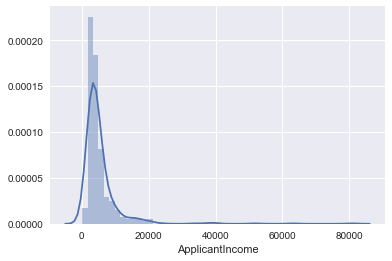

In [29]:
# The ApplicantIncome attribute
ax = plt.subplots()
sns.distplot(df_train.ApplicantIncome, kde=True)

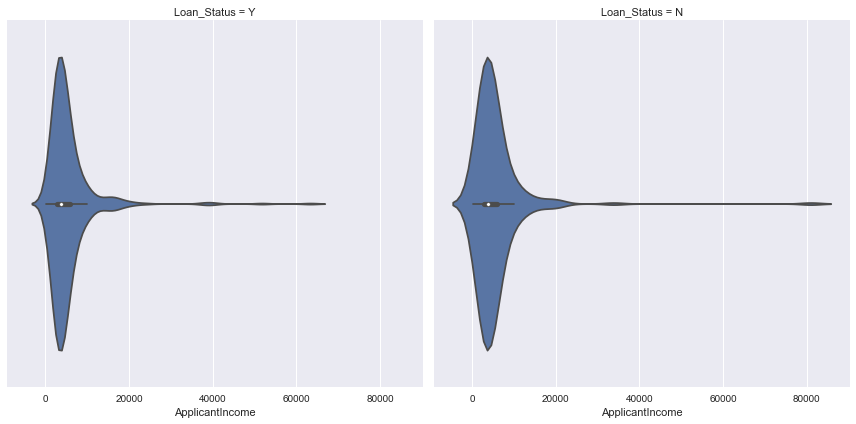

In [30]:
# Comparing the ApplicantIncome and Loan_Status attributes
sns.factorplot(x='ApplicantIncome', col='Loan_Status', kind='violin', data=df_train, hue='Loan_Status', size=6);

Text(0,0.5,'Loan Amount')

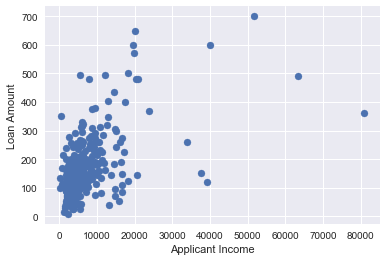

In [31]:
# Comparing the ApplicantIncome and LoanAmount attributes
plt.scatter(df_train.ApplicantIncome,df_train.LoanAmount)
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")

There is a high concentration of Applicants having loan amounts less than 400 and income less than 20000

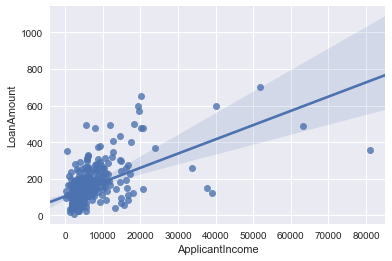

In [32]:
sns.regplot(df_train.ApplicantIncome,df_train.LoanAmount)

An attempt to fit a regressoin line

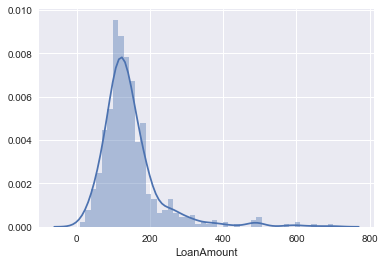

In [33]:
# The LoanAmount attribute
ax = plt.subplots()
sns.distplot(df_train.LoanAmount, kde=True)

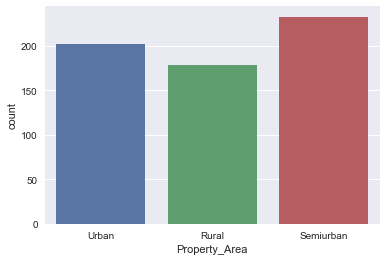

In [34]:
# The Property_Area attribute
ax = plt.subplots()
sns.countplot(x='Property_Area', data=df_train);

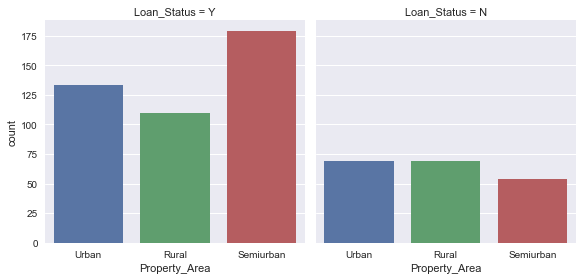

In [35]:
# Comparing the Property_Area and Loan_Status attributes
sns.factorplot(x='Property_Area', col='Loan_Status', kind='count',data=df_train)

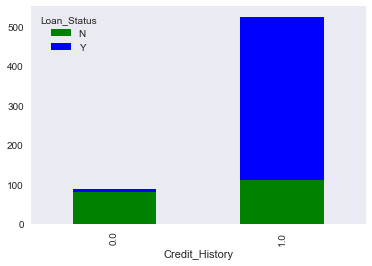

In [36]:
data_cr = pd.crosstab(df_train['Credit_History'], df_train['Loan_Status'])
data_cr.plot(kind='bar', stacked=True, color=['green','blue'], grid=False)

#### Feature engineering and selection

In [37]:
df_train_features = df_train.copy()

In [38]:
df_train_features.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


Convert "Loan_Status" values to 'Y' is 1 and 'N' is 0, this will enable usage with more attributes and as the target variable.

In [39]:
df_train_features['Loan_Status'] = df_train_features.Loan_Status.apply(lambda x: x.replace("Y","1"))
df_train_features['Loan_Status'] = df_train_features.Loan_Status.apply(lambda x: x.replace("N","0"))
df_train_features['Loan_Status'] = df_train_features.Loan_Status.apply(lambda x: int(x))

In [40]:
df_train_features.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [41]:
# Print out the variance of the selected numeric attributes
print(df_train_features["ApplicantIncome"].var())
print(df_train_features["CoapplicantIncome"].var())
print(df_train_features["LoanAmount"].var())
print(df_train_features["Loan_Amount_Term"].var())

37320390.1672
8562929.51839
7062.2959746
4151.04824354


In [42]:
# Apply the log normalization function to the attributes.
# The 0 values in CoapplicantIncome would give a divide by zero error, hence the introduction of a negligible value 
# of 0.1 to replace 0

df_train_features["ApplicantIncome_log"] = np.log(df_train_features["ApplicantIncome"])
df_train_features["CoapplicantIncome_log"] = np.log(df_train_features["CoapplicantIncome"].apply(lambda x: 0.1 if x==0 else x))

In [43]:
df_train_features.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,CoapplicantIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1,8.674026,-2.302585
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0,8.430109,7.318540
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1,8.006368,-2.302585
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1,7.856707,7.765569
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1,8.699515,-2.302585


In [44]:
# Check the variance of the attributes column 
print(df_train_features["ApplicantIncome_log"].var())
print(df_train_features["CoapplicantIncome_log"].var())

0.416364600513
25.1301302887


In [45]:
df_train_features = df_train_features.drop(['ApplicantIncome'], axis=1)
df_train_features = df_train_features.drop(['CoapplicantIncome'], axis=1)

In [46]:
#Remove 'Loan_ID' from datasets, we dont need it for modeling
df_loan_ids = df_train_features['Loan_ID']
df_train_features = df_train_features.drop(['Loan_ID'], axis=1)

In [47]:
df_loan_status = df_train_features['Loan_Status']
df_train_features = df_train_features.drop(['Loan_Status'],axis=1)

In [48]:
# Transform dataset_categorical_attributes into binary variables
df_train_features_dum = pd.get_dummies(df_train_features, drop_first=True)
df_train_features_dum.head()

,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_log,CoapplicantIncome_log,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,146.412162,360.0,1.0,8.674026,-2.302585,1,0,0,0,0,0,0,0,1
1,128.000000,360.0,1.0,8.430109,7.318540,1,1,1,0,0,0,0,0,0
2,66.000000,360.0,1.0,8.006368,-2.302585,1,1,0,0,0,0,1,0,1
3,120.000000,360.0,1.0,7.856707,7.765569,1,1,0,0,0,1,0,0,1
4,141.000000,360.0,1.0,8.699515,-2.302585,1,0,0,0,0,0,0,0,1


In [49]:
df_train_features_dum['Loan_Status'] = df_loan_status

In [50]:
# Compute pairwise correlation of attributes, using pearson standard correlation coefficient 
corr = df_train_features_dum.corr()
print (corr['Loan_Status'].sort_values(ascending=False), '\n')

Loan_Status                1.000000
Credit_History             0.540556
Property_Area_Semiurban    0.136540
Married_Yes                0.091478
CoapplicantIncome_log      0.063996
Dependents_2               0.062384
Gender_Male                0.017987
ApplicantIncome_log        0.010977
Self_Employed_Yes         -0.003700
Loan_Amount_Term          -0.022549
Dependents_3+             -0.026123
LoanAmount                -0.036416
Dependents_1              -0.038740
Property_Area_Urban       -0.043621
Education_Not Graduate    -0.085884
Name: Loan_Status, dtype: float64 



#### Split-out Training and Validation dataset

In [51]:
# Split-out validation dataset
array = df_train_features_dum.values
X = array[:,0:14].astype(float)
y = array[:,14]
validation_size = 0.20
seed = 7
X_train, X_validation, y_train, y_validation = train_test_split(X, y,
test_size=validation_size, random_state=seed) #, stratify=y

#### Evaluate Algorithms: Baseline
I don’t know what algorithms will do well on this dataset, a 10-fold cross-validation will be used on the dataset and  the algorithms will be evaluated using the accuracy metric. This is a gross metric that will give a quick idea of how correct a given model is. More useful on binary classification problems like this one.

In [52]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

In [53]:
# Spot-Check Algorithms
models = []
models.append(( 'LR' , LogisticRegression()))
models.append(( 'LDA' , LinearDiscriminantAnalysis()))
models.append(( 'KNN' , KNeighborsClassifier()))
models.append(( 'CART' , DecisionTreeClassifier()))
models.append(( 'NB' , GaussianNB()))
models.append(( 'SVM' , SVC()))
models.append(( 'RF' , RandomForestClassifier()))

The algorithms all use default tuning parameters. To be displayed are the mean and standard deviation of accuracy for each algorithm as it is calculated, the results will be collected for later use.

In [54]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.800449 (0.041382)
LDA: 0.802490 (0.041610)
KNN: 0.596653 (0.083402)
CART: 0.672041 (0.065701)
NB: 0.790286 (0.028378)
SVM: 0.655714 (0.105674)
RF: 0.763755 (0.039919)


Linear Discriminant Analysis algorithm marginally performed better than Logistic Regression in accuracy.
The algorithm results are mean accuracy values. Looking at the distribution of accuracy values calculated across cross-validation folds will give a better understanding about the algorithm performance. The box and whisker plots can be used to achieve this.

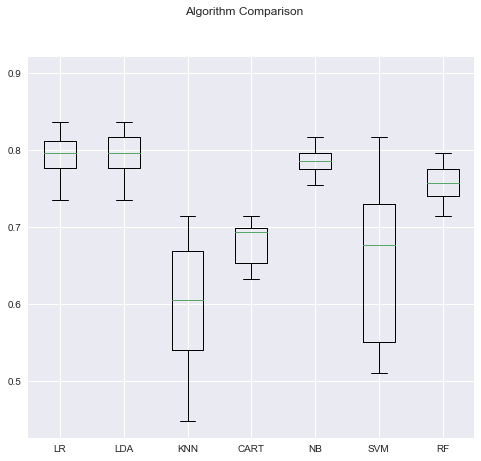

In [55]:
# Compare Algorithms
fig = plt.figure(figsize=(8,7))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [58]:
# Make predictions on validation dataset
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)
predictions = LDA.predict(X_validation)
print('accuracy_score')
print(accuracy_score(y_validation, predictions))
print(' ')
print('confusion_matrix')
print(confusion_matrix(y_validation, predictions))
print(' ')
print('classification_report')
print(classification_report(y_validation, predictions))

accuracy_score
0.829268292683
 
confusion_matrix
[[20 19]
 [ 2 82]]
 
classification_report
             precision    recall  f1-score   support

        0.0       0.91      0.51      0.66        39
        1.0       0.81      0.98      0.89        84

avg / total       0.84      0.83      0.81       123



In [57]:
# Adding scaling to the preprocessing increased model performance for LR,LDA,NB and RF 

# Before 
# LR: 0.663714 (0.064201)*
# LDA: 0.676082 (0.081130)*
# KNN: 0.605102 (0.059508)
# CART: 0.690286 (0.045262)
# NB: 0.688327 (0.066725)*
# SVM: 0.659755 (0.063784)
# RF: 0.708735 (0.038903)

# After
# LR: 0.800449 (0.041382)*
# LDA: 0.802490 (0.041610)*
# KNN: 0.596653 (0.083402)
# CART: 0.680122 (0.063746)
# NB: 0.790286 (0.028378)*
# SVM: 0.655714 (0.105674)
# RF: 0.747429 (0.029322)

### Conclusion
Applicants that are Male, Married, have no dependents, Not self employed, have property in the semi urban area and a credit history value of 1, have a higher likelihood of getting a loan from the company. 

There are more feature engineering opportunities in the datasets that will be explored to further improve the model performance.